      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

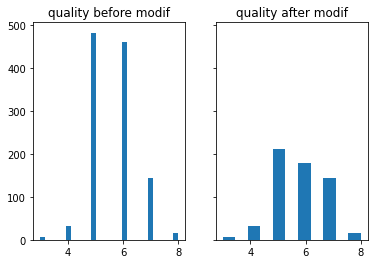

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('WineQT.csv')
print(df)
import numpy as np
import matplotlib.pyplot as plt
# load the dataset

y_train = df['quality']
X_train= [df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']]
X_features = ['volatile acidity','alcohol','sulphates','citric acid']
X_train=np.transpose(np.asmatrix(X_train))
y_train=np.asarray(y_train)


def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(X_norm)
import random
fig,ax=plt.subplots(1,2,sharey=True)
ax[0].hist(df["quality"], bins='auto',label="quality")
ax[0].set_title("quality before modif")
supp=[]
#on supprime aleatoirement des valeurs de notes 5 et 6 (diviser par 3)
for i in range(len(y_train)):
    if y_train[i]==5 or y_train[i]==6:
        rand=random.random()
        if(rand>0.4):
            supp.append(i)
for j in range(len(supp)):
    y_train2=np.delete(y_train,supp)
    X_norm2=np.delete(X_norm,supp,0)


ax[1].hist(y_train2, bins='auto',label="quality")
ax[1].set_title("quality after modif")

print(y_train2.shape)
print(X_norm2.shape)

DIVISION DU JEU DE DONNEES EN TRAIN SET, CROSS VALIDATION ET TEST SET:

In [17]:
print(X_norm2.shape)
print(y_train2.shape)

debutcv=int(X_norm2.shape[0]*0.6)
debuttest=int(X_norm2.shape[0]*0.8)

X_train=X_norm2[0:debutcv]
X_cv=X_norm2[debutcv:debuttest]
X_test=X_norm2[debuttest:]

y_train=y_train2[0:debutcv]
y_cv=y_train2[debutcv:debuttest]
y_test=y_train2[debuttest:]

print(X_train.shape,X_cv.shape,X_test.shape)
print(y_train.shape,y_cv.shape,y_test.shape)

(590, 4)
(590,)
(354, 4) (118, 4) (118, 4)
(354,) (118,) (118,)
[[ 0.93933222 -0.96338181 -0.57365783 -1.36502663]
 [ 0.93933222 -0.96338181 -0.57365783 -1.36502663]
 [ 0.38239855 -0.96338181 -1.1607736  -1.05983811]
 ...
 [-1.17701572  1.07041225  0.83542003  0.87302251]
 [-1.23270909  0.88552188  1.12897792  0.72042825]
 [ 0.6330187  -0.22382033  0.30701583 -0.75464959]]
[[ 0.93933222 -0.96338181 -0.57365783 -1.36502663]
 [ 0.93933222 -0.96338181 -0.57365783 -1.36502663]
 [ 0.38239855 -0.96338181 -1.1607736  -1.05983811]
 ...
 [ 0.32670518 -1.24071737 -0.92592729  0.11005121]
 [-0.73146879  0.7930767  -0.98463887  0.26264547]
 [-0.95424225 -0.96338181 -0.92592729  0.16091596]]
